<a href="https://www.kaggle.com/code/theanjalirai/deep-learning-perceptron?scriptVersionId=271009617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧠 **Perceptron: The Simplest Neural Network**

**Perceptron** is the simplest type of artificial neural network — a single-layer model that makes predictions based on a linear combination of input features. It mimics a biological neuron by taking multiple inputs, applying weights, summing them, and passing the result through an activation function to produce an output.


## ⚙️ **How It Works:**

1. **Input:** The perceptron receives multiple input values (features).
2. **Weighted Sum:** Each input is multiplied by a corresponding weight, and all are summed up along with a bias term.
   z = w_1x_1 + w_2x_2 + ... + w_nx_n + b
3. **Activation Function:** The sum is passed through an activation function (commonly a step function) to decide the output.
4. **Output:** The perceptron outputs a binary result (e.g., 0 or 1), classifying the input into one of two categories.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/linearly-separable-dataset/placement.csv')
df.head(5)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

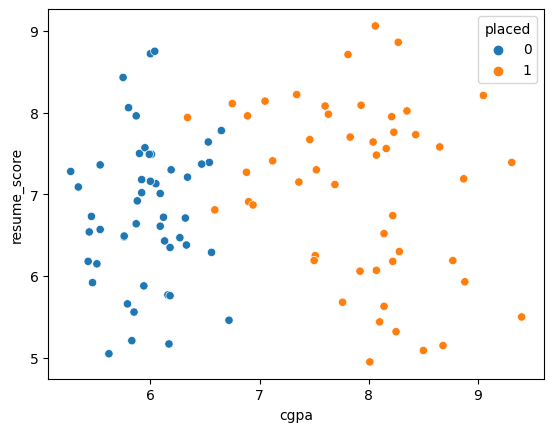

In [3]:
sns.scatterplot(data = df, x = 'cgpa', y ='resume_score' ,hue='placed')


#### The perceptron is meant to fit a line that would separate the two classes - placed and not placed, not necessarily a best-fit line. The perceptron would find the value of weights( w_1 and w_2) and bias (b).


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
X.head(5)

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [6]:
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: placed, dtype: int64

In [7]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [8]:
p.fit(X,y)

Perceptron()

In [9]:
# weights
p.coef_

array([[ 40.26, -36.  ]])

In [10]:
# bias
p.intercept_

array([-25.])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

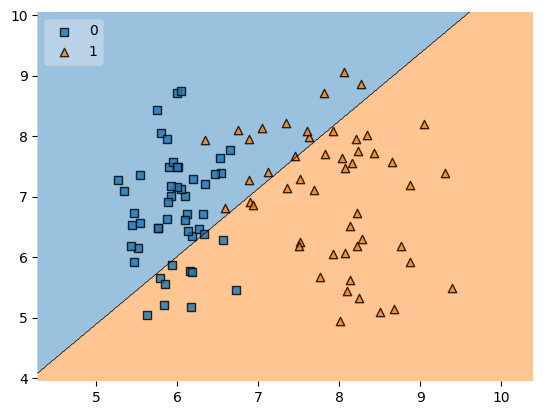

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values , y.values , clf = p,legend = 2)

# Training the perceptron

## 🧠 Perceptron Training Intuition

The **Perceptron** tries to find a **linear decision boundary** (a line in 2D or a plane in higher dimensions) that separates the data points into two classes — say, **+1** and **–1**.

This line (or hyperplane) is represented by:

\[
w_1x_1 + w_2x_2 + b = 0
\]

where:

- \( w_1, w_2 \) are the **weights** (define the slope of the line)  
- \( b \) is the **bias** (defines the intercept)

---

## ⚙️ How Training Works

### 1. **Start with random weights and bias**
The perceptron begins with arbitrary values for \( w_1, w_2, b \).  
So initially, the separating line can be anywhere.

---

### 2. **Make predictions for all training samples**
For each data point \( (x_1, x_2) \), the perceptron computes:

\[
y_pred = (w_1x_1 + w_2x_2 + b)
\]

---

### 3. **Check for misclassification**
If the predicted label \( y_{\text{pred}} \) is not equal to the true label \( y_{\text{true}} \),  
then the point is **misclassified** — meaning the line doesn’t correctly separate it.

---

### 4. 🧩 Update (move) the line

#### 🟢 Case 1: Misclassified as negative but actually positive
If \( (w_1x_1 + w_2x_2 + b) < 0 \) but \( y_true = +1 \):

➡️ The line must move **toward** that point.

**Update rule:**

\[
W_new = W_old- lr*X_i
\]


#### 🔴 Case 2: Misclassified as positive but actually negative
If \( (w_1x_1 + w_2x_2 + b) >= 0 \) but \( y_true = -1 \):

➡️ The line must move **away** from that point.

**Update rule:**

\[
W_new = W_old- lr*X_i
\]




#### The simple rule would be to use this
#### Wnew = Wold + n(y_true - y_pred)Xi
#### where y_true and y_pred will be -1,+1 or 0 

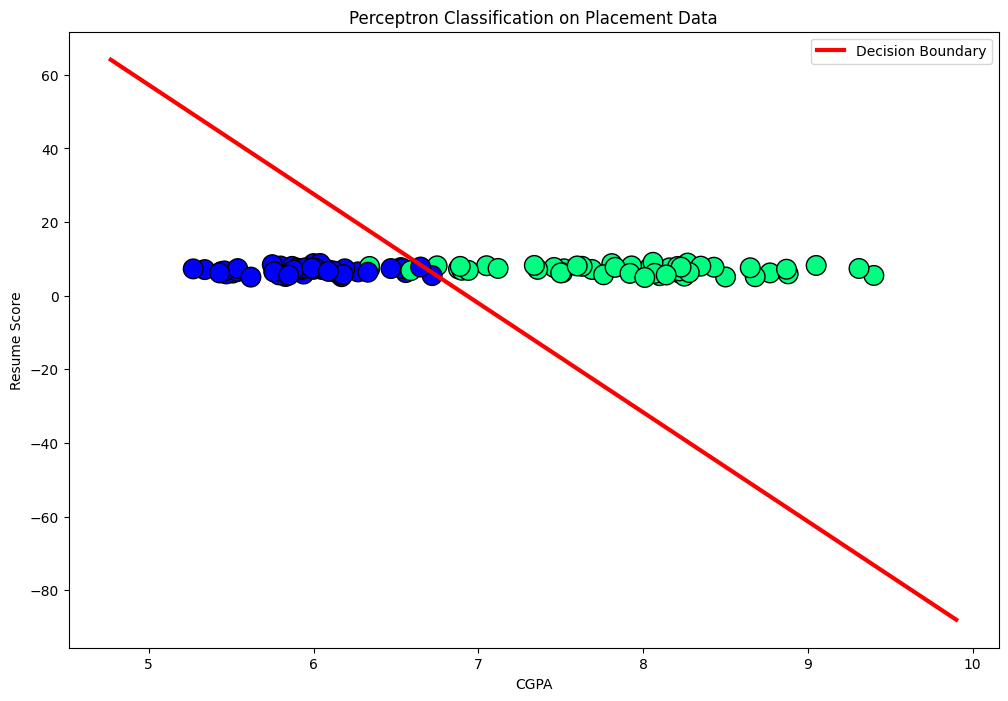

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Step activation function (Perceptron output: 0 or 1)
def step(z):
    return 1 if z > 0 else 0

# 2️⃣ Perceptron training function for small datasets
def perceptron(X, y, epochs=1000, lr=0.05):
  
    # Adding a bias column (first column = 1)
    X_bias = np.insert(X, 0, 1, axis=1)
    
    # Initializing weights (bias + features)
    weights = np.ones(X_bias.shape[1])

    # Looping over epochs
    for epoch in range(epochs):
        # Looping over all points in dataset
        for j in range(X_bias.shape[0]):
            # Computing predicted output
            y_hat = step(np.dot(X_bias[j], weights))
            # Updating weights if prediction is wrong
            weights += lr * (y[j] - y_hat) * X_bias[j]

    # Returning bias and feature weights separately
    return weights[0], weights[1:]

# 3️⃣ 
X = df[['cgpa', 'resume_score']].values
# Target: Placed (0 or 1)
y = df['placed'].values

# 4️⃣ Training perceptron
intercept_, coef_ = perceptron(X, y, epochs=1000, lr=0.05)

# 5️⃣ Computing decision boundary
# Equation: w0 + w1*x1 + w2*x2 = 0 → x2 = m*x1 + b
m = -(coef_[0] / coef_[1])  # slope
b = -(intercept_ / coef_[1])  # intercept
# Generate 100 x-values for plotting the line
x_input = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
y_input = m * x_input + b  # corresponding y-values

# 6️⃣ Ploting data points and decision boundary
plt.figure(figsize=(12,8))  # bigger figure
# Scatter plot of data points
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=200, edgecolor='k')  

plt.plot(x_input, y_input, color='red', linewidth=3, label='Decision Boundary')
# Labels and title
plt.xlabel('CGPA')
plt.ylabel('Resume Score')
plt.title('Perceptron Classification on Placement Data')
plt.legend()
plt.show()


### ⚠️ **Problems with the Perceptron Algorithm**
1. **No guarantee of best line:**
   * The perceptron just finds *a* line that separates the classes — not the *best* or *optimal* one.
   * It stops as soon as all training points are correctly classified (if possible).
2. **No convergence for non-linearly separable data:**
   * If the data can’t be separated by a straight line, the perceptron keeps updating weights forever.
   * It never settles on a stable solution.

### ✅ **When it works well**
* When data is **linearly separable**.
* When features are **normalized**.
* When you just need a **simple, fast classifier**.


### ⚙️To quantify the result, we use the Loss Function
#### The loss function helps us quantify how wrong the perceptron (or any model) is — it tells us how far our predictions are from the true labels.
#### Without a loss, the perceptron just knows correct/incorrect — not how bad the error is.

#### Loss functions we can use
1. most simplest - number of missclassified points ( but it gives same importance to each and every missclassfied points. Rather than how vast the error is.)
2. MSE
3. used in perceptron -> perceptron loss